In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

from train import *
from models import *

import matplotlib.pyplot as plt
import numpy as np

plt.xkcd()
plt.rcParams["figure.figsize"] = (10,5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalized data
    """
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [37]:
test_set = datasets.MiniplacesDataset('test')
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=2)
data_iter = iter(test_loader)
classes = []
txt_root = './miniplaces/development_kit/data'
txt_dir = os.path.join(txt_root, "categories" + '.txt')
with open(txt_dir, 'r') as f:
    for line in f:
        tokens = line.strip().split()
        classes.append(tokens[0])

In [42]:
model = AdaHAN(hidden_size=8, n_classes=len(classes), k=5, adaptive=True)
model.load_state_dict(torch.load('./data/AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10.pth'))

<All keys matched successfully>

test/00000002.jpg


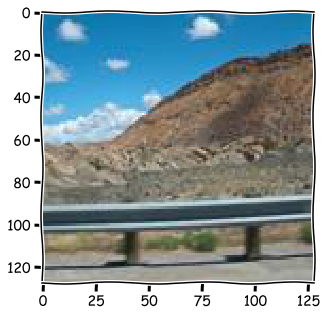

In [43]:
image_path, input_tensor = data_iter.next()

img = plt.imread('./miniplaces/images/' + image_path[0])
plt.imshow(img)
print(image_path[0])

In [44]:
class_preds, latent_mask = model(input_tensor)

_, predicted = torch.max(class_preds, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Predicted:  /d/desert/sand


Number of latent spatial locations selected for attention: 576.0.
Percentage of input image pixels attended to: 100.0%.



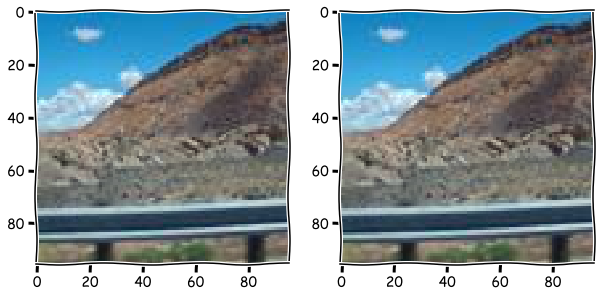

In [45]:
visualizer = AttentionVisualizer()

attended_tensor = visualizer(input_tensor, latent_mask)
attended_np = normalize(attended_tensor.squeeze(dim=0).permute(1, 2, 0).detach().numpy())
image_np = normalize(input_tensor.squeeze(dim=0).permute(1, 2, 0).detach().numpy())

fig, (ax_orig, ax_attn) = plt.subplots(ncols=2)
ax_orig.imshow(image_np)
ax_attn.imshow(attended_np)

Seems like for this task, it is choosing to attend to all the image pixels... which kinda makes sense considering the task of image classification generally requires more information than what can be provided in just spatial location

In [46]:
latent_mask

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.,